In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
!pip install --upgrade xlrd
!pip install statsmodels --upgrade
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read the dataset into python environment
data=pd.read_excel(r'https://github.com/hashi4all/RIO-125-Forecasting-System---Project-Demand-of-Products-at-a-Retail-Outlet-Based-on-Historical-Data/blob/main/Sample%20-%20Superstore.xls?raw=true',parse_dates=['Order Date'])

In [ ]:
#visual inspection of raw data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#missing value detection
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#columns of dataset
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#shape of data
data.shape

(9994, 21)

In [ ]:
#summary of data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
variables=['Order Date','Category', 'Sales']
grp_var=variables[:2]
outcome_var=variables[2]
base=data.groupby(grp_var)[outcome_var].sum().reset_index()

In [ ]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.448
1,2011-01-05,Office Supplies,288.060
2,2011-01-06,Office Supplies,19.536
3,2011-01-07,Furniture,2573.820
4,2011-01-07,Office Supplies,685.340


In [ ]:
print(base['Category'].unique())

['Office Supplies' 'Furniture' 'Technology']


In [ ]:
#Setting Order Date as index
base.set_index('Order Date',inplace=True)

In [ ]:
print(base.index.unique)

<bound method Index.unique of DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)>


In [ ]:
fur=base.loc[base['Category']=='Furniture']
fur=fur.sort_values('Order Date')
fur=fur.groupby('Order Date')['Sales'].sum()

In [ ]:
fur

Order Date
2011-01-07    2573.8200
2011-01-08      76.7280
2011-01-11      51.9400
2011-01-12       9.9400
2011-01-14     879.9390
                ...    
2014-12-25    1393.4940
2014-12-26     832.4540
2014-12-29     551.2568
2014-12-30    2330.7180
2014-12-31     323.1360
Name: Sales, Length: 890, dtype: float64

In [ ]:
fur.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

In [ ]:
office=base.loc[base['Category']=='Office Supplies']
office=office.sort_values('Order Date')
office=office.groupby('Order Date')['Sales'].sum()

In [ ]:
office

Order Date
2011-01-04      16.448
2011-01-05     288.060
2011-01-06      19.536
2011-01-07     685.340
2011-01-08      10.430
                ...   
2014-12-27     814.594
2014-12-28      13.248
2014-12-29    1091.244
2014-12-30     282.440
2014-12-31     299.724
Name: Sales, Length: 1149, dtype: float64

In [ ]:
office.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-14',
               '2011-01-17', '2011-01-19',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1149, freq=None)

In [ ]:
tech=base.loc[base['Category']=='Technology']
tech=tech.sort_values('Order Date')
tech=tech.groupby('Order Date')['Sales'].sum()

In [ ]:
tech

Order Date
2011-01-07    1147.940
2011-01-10      31.200
2011-01-14     646.740
2011-01-16     149.950
2011-01-17     124.200
                ...   
2014-12-26     401.208
2014-12-28     164.388
2014-12-29      14.850
2014-12-30     302.376
2014-12-31      90.930
Name: Sales, Length: 825, dtype: float64

In [ ]:
tech.index

DatetimeIndex(['2011-01-07', '2011-01-10', '2011-01-14', '2011-01-16',
               '2011-01-17', '2011-01-21', '2011-01-27', '2011-02-02',
               '2011-02-03', '2011-02-07',
               ...
               '2014-12-19', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=825, freq=None)

## Furniture

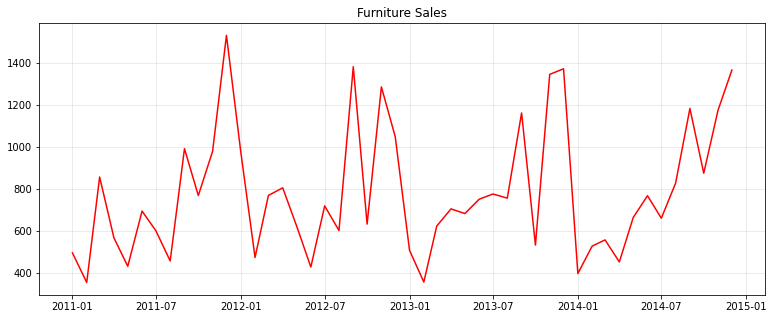

In [ ]:
#considering furniture sales 
#resampling to 'Month Start'
df_furniture=fur.resample('MS').mean()
plt.figure(figsize=(13,5))
plt.plot(df_furniture,color='r')
plt.title('Furniture Sales')
plt.grid(alpha=0.3)

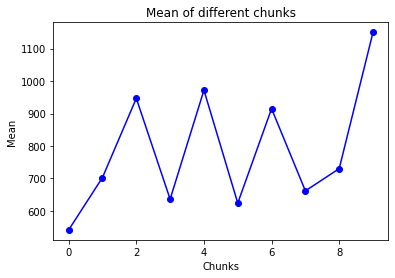

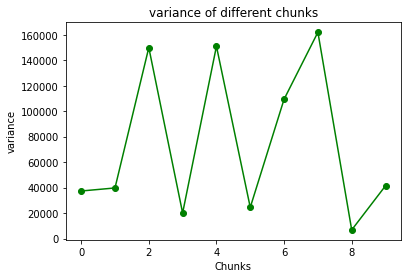

In [ ]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_furniture,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of furniture sales')

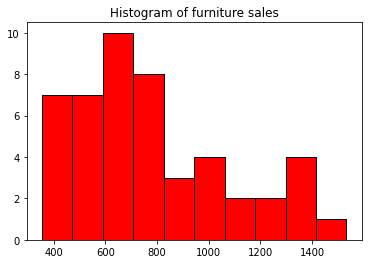

In [ ]:
#2.Histogram plots
plt.hist(df_furniture,color='red',edgecolor='black')
plt.title('Histogram of furniture sales')

In [ ]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_furniture,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -5.648685173629498
p-value: 9.975923178951158e-07


In [ ]:
#non stationary to stationary transformation

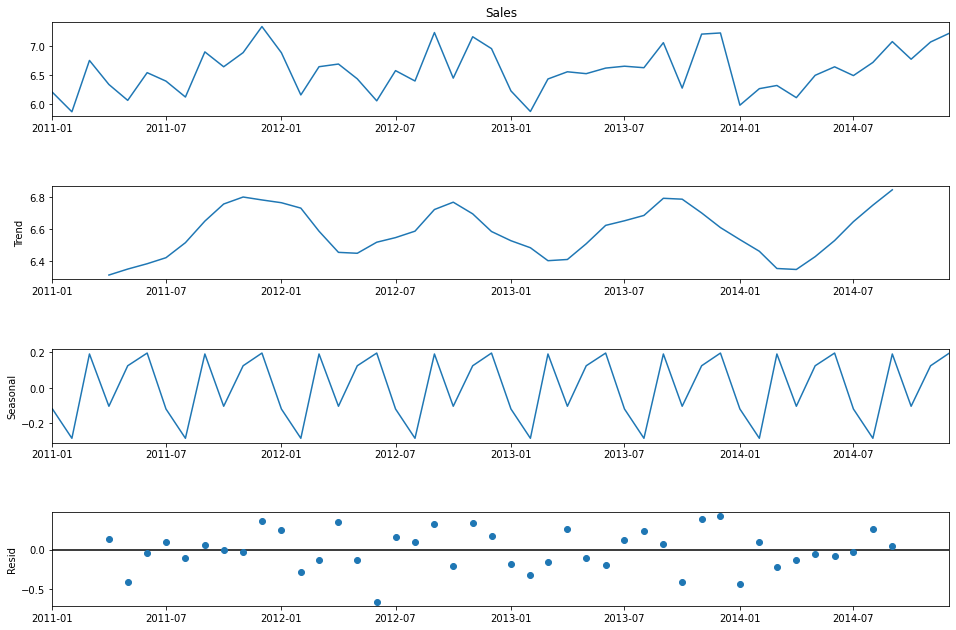

In [ ]:
df_log_furniture=np.log1p(df_furniture)
#Decomposition
#its additive-->Seasonality is independent of trend
decomp_fur=seasonal_decompose(df_log_furniture,model='additive',period=6)
fig=decomp_fur.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

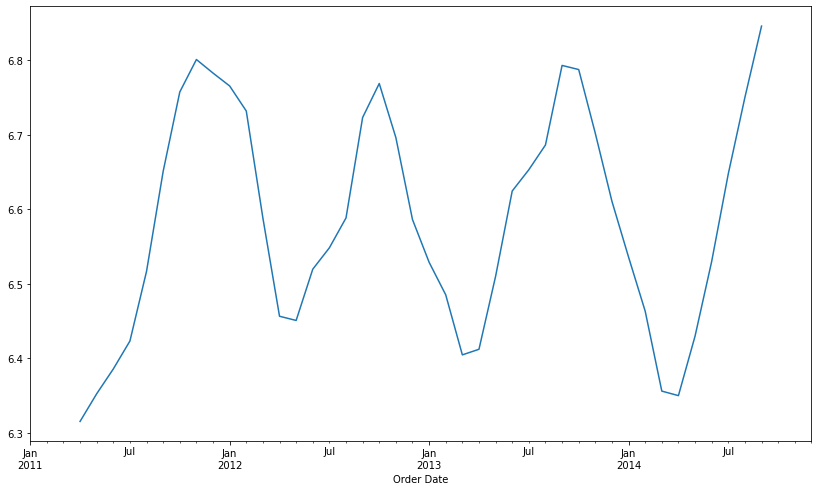

In [ ]:
#Trend component
decomp_fur.trend.plot(figsize=(14,8))

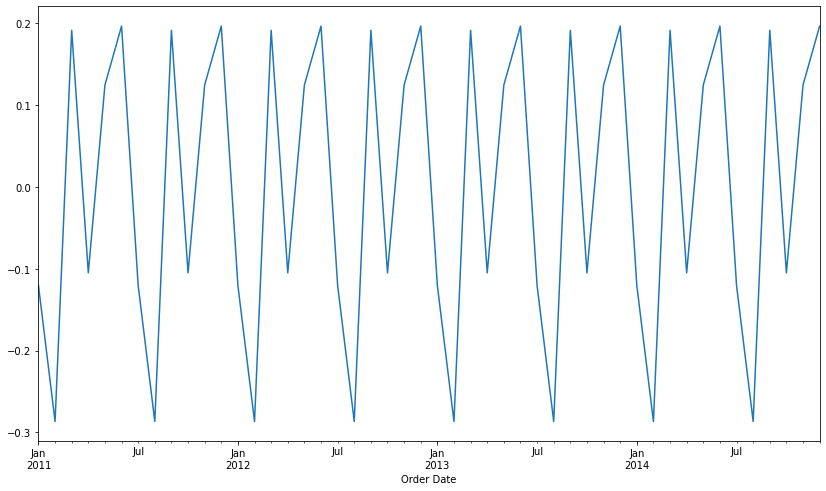

In [ ]:
#seasonal component
decomp_fur.seasonal.plot(figsize=(14,8))

In [ ]:
#Predictive analysis

1.Triple Exponential Smoothing

In [ ]:
#time component
time=np.arange(len(df_log_furniture))
np_furniture=df_log_furniture.to_numpy()

In [ ]:
np_furniture

array([6.20856638, 5.8750824 , 6.75494382, 6.34298083, 6.07085132,
       6.54543477, 6.40053897, 6.12800752, 6.90108646, 6.64641056,
       6.88879821, 7.33517646, 6.8868671 , 6.16365339, 6.64728549,
       6.69310427, 6.4393451 , 6.06277423, 6.58023173, 6.40260023,
       7.23258189, 6.4520177 , 7.16061401, 6.95688388, 6.23280722,
       5.88016497, 6.43719918, 6.5604044 , 6.52830262, 6.62363809,
       6.65599368, 6.63019223, 7.05924257, 6.28076754, 7.2059138 ,
       7.22541907, 5.98796376, 6.27132826, 6.32570987, 6.11729587,
       6.49995488, 6.64550025, 6.49531756, 6.72057299, 7.07742291,
       6.77578008, 7.07069337, 7.22096999])

In [ ]:
#Train Test split
#20% of 48 instance is taken as test size
test_size=10
train=np_furniture[:-test_size]
test=np_furniture[-test_size:]

In [ ]:
#Model
from statsmodels.tsa.api import ExponentialSmoothing
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [ ]:
triple_preds=np.expm1(triple_preds)
train=np.expm1(train)
test=np.expm1(test)

In [ ]:
#Evaluation
from math import sqrt
triple_mse=mean_squared_error(test,triple_preds)
print('MSE:',triple_mse)
rmse=sqrt(triple_mse)
print('RMSE:',rmse)

MSE: 24843.36241593514
RMSE: 157.61777316005686


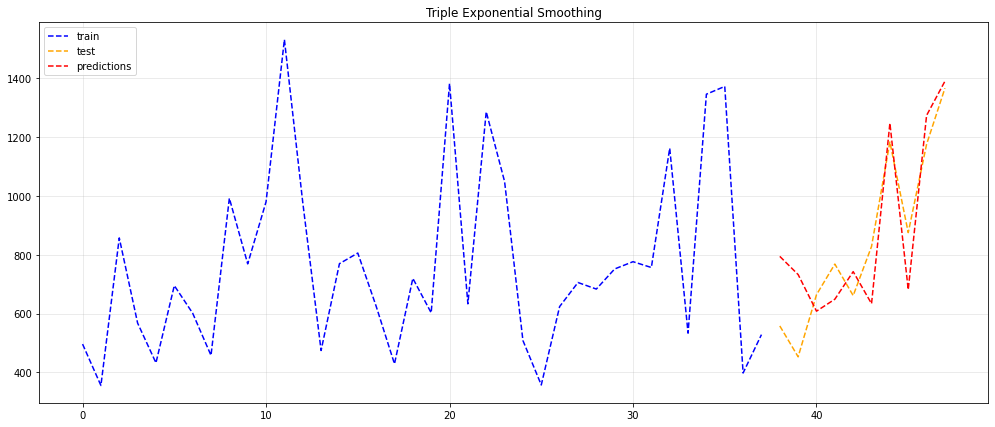

In [ ]:
#Prediction Plot
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [ ]:
print('________PREDICTIONS_________')
print(triple_preds)

________PREDICTIONS_________
[ 794.48713547  732.54096292  608.04201634  648.70907257  742.58082508
  633.50312027 1247.95966723  681.24449043 1274.20591226 1390.6247383 ]


2.SARIMA Model

In [ ]:
#pdq estimation (autoARIMA function)
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 


In [ ]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_furniture,start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0,max_P=3,start_Q=0,max_Q=3,d=None,D=1,seasonal=True,m=12,trace=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20.013, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=20.804, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=18.467, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=18.386, Time=0.05 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=18.852, Time=0.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=16.528, Time=0.18 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=18.473, Time=0.51 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=20.161, Time=1.50 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=15.202, Time=0.23 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,1,2)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=17.257, Time=0.18 s

In [ ]:
#Model with best order
from statsmodels.tsa.statespace.sarimax import SARIMAX
sar = SARIMAX(df_log_furniture, 
                                order=(0,0,0),
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                      Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                  -5.264
Date:                    Fri, 17 Jun 2022   AIC                             16.528
Time:                            17:39:05   BIC                             21.278
Sample:                        01-01-2011   HQIC                            18.186
                             - 12-01-2014                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.034      0.744      0.457      -0.041       0.091
ma.S.L12      -0.7046      0.539     -1.307      0.191      -1.761       0.352
sigma2         0.0637      0.033      1.934      0.053      -0.001       0.128
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.95   Prob(JB):                         0.43
Heteroskedasticity (H):               0.81   Skew:                            -0.33
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

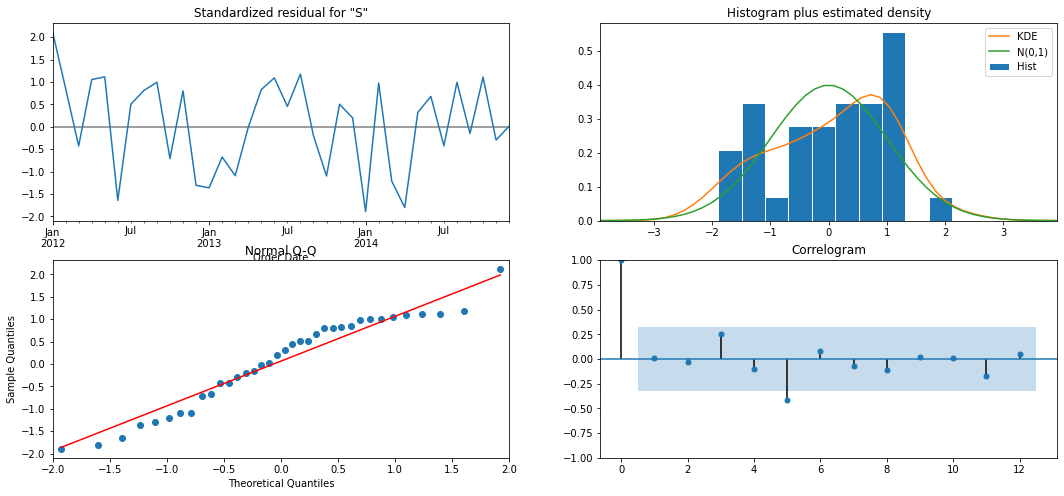

In [ ]:
#Diagnostics plot
sar.plot_diagnostics(lags=12,figsize=(18,8))
plt.show()

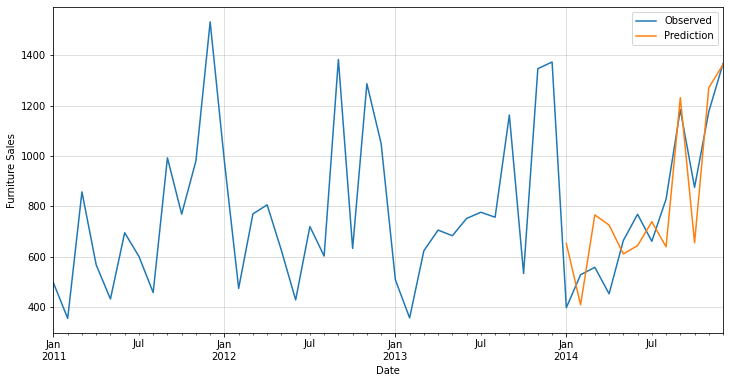

In [ ]:
#Prediction Plot
pd.plotting.register_matplotlib_converters()
pred=sar.get_prediction(start=pd.to_datetime('2014-01-01'),dynamic=False)
pred=pred.predicted_mean
pred=np.expm1(pred)
ax=df_furniture.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('________PREDICTIONS_________')
print(pred)

________PREDICTIONS_________
Order Date
2014-01-01     652.610135
2014-02-01     409.222668
2014-03-01     765.771341
2014-04-01     725.463565
2014-05-01     611.018859
2014-06-01     643.874704
2014-07-01     738.676787
2014-08-01     639.040972
2014-09-01    1231.644403
2014-10-01     655.529704
2014-11-01    1270.969608
2014-12-01    1362.694820
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Evaluation
from sklearn.metrics import mean_squared_error
test=df_furniture['2014-01-01':]
Mse=mean_squared_error(test,pred)
print('MSE:',Mse)
rmse=sqrt(Mse)
print('RMSE:',rmse)

MSE: 26390.204141302343
RMSE: 162.4506206245527


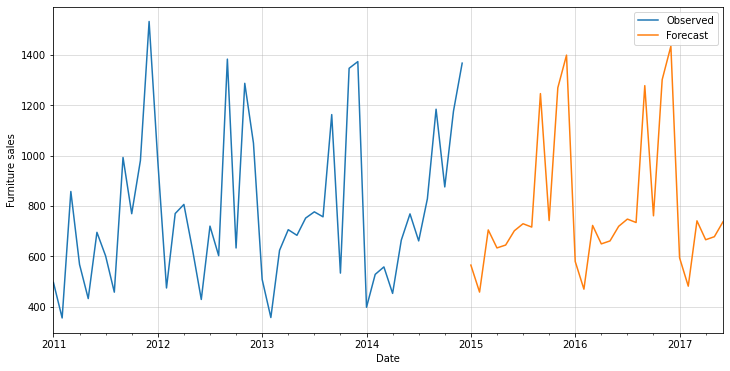

In [ ]:
#Forecast Plot
future_fcst=sar.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_furniture.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Furniture sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('________FORECAST________')
print(fcst)

________FORECAST________
2015-01-01     564.973899
2015-02-01     457.832797
2015-03-01     704.608823
2015-04-01     633.163430
2015-05-01     644.599415
2015-06-01     701.279156
2015-07-01     729.202010
2015-08-01     715.963903
2015-09-01    1245.903632
2015-10-01     741.952671
2015-11-01    1269.029250
2015-12-01    1398.650984
2016-01-01     579.298353
2016-02-01     469.445576
2016-03-01     722.467353
2016-04-01     649.213720
2016-05-01     660.939143
2016-06-01     719.053413
2016-07-01     747.682978
2016-08-01     734.109823
2016-09-01    1277.462004
2016-10-01     760.756350
2016-11-01    1301.172917
2016-12-01    1434.075298
2017-01-01     593.985351
2017-02-01     481.352267
2017-03-01     740.777871
2017-04-01     665.670234
2017-05-01     677.692419
2017-06-01     737.277527
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Prophet model

3.Prophet Model

In [ ]:
from fbprophet import Prophet

In [ ]:
fur=pd.DataFrame({'ds':df_furniture.index,'y':df_furniture.values})
fur_model=Prophet()
fur_model.fit(fur)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Blank data frame
fur_fcst=fur_model.make_future_dataframe(periods=36,freq='MS')
print(fur_fcst.head())
fur_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


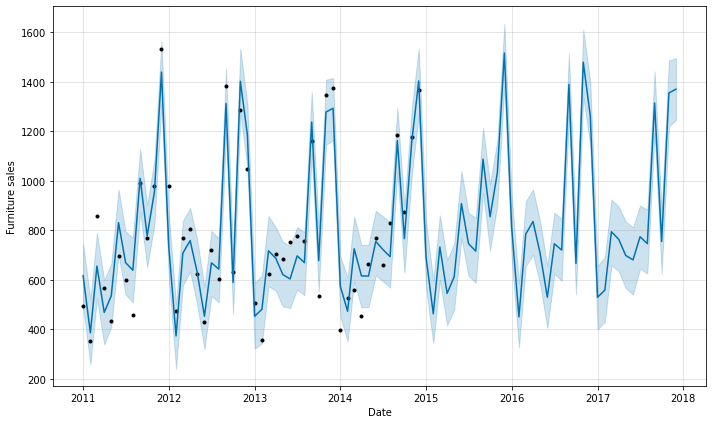

In [ ]:
#Populate df and Forecast
fur_fcst=fur_model.predict(fur_fcst)
fur_model.plot(fur_fcst,xlabel='Date',ylabel='Furniture sales')
plt.show()

In [ ]:
print('_________FORECAST__________')
print(fur_fcst)

_________FORECAST__________
           ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  724.986581   489.191163   746.896250   724.986581   724.986581   
1  2011-02-01  726.620285   257.977044   519.847201   726.620285   726.620285   
2  2011-03-01  728.095889   525.196796   788.541968   728.095889   728.095889   
3  2011-04-01  729.729593   338.908066   598.517820   729.729593   729.729593   
4  2011-05-01  731.310597   409.884585   664.839844   731.310597   731.310597   
..        ...         ...          ...          ...          ...          ...   
79 2017-08-01  851.642177   625.669876   883.319868   851.639386   851.645411   
80 2017-09-01  853.275341  1193.538040  1441.828080   853.272412   853.278750   
81 2017-10-01  854.855822   625.340106   879.320570   854.852757   854.859422   
82 2017-11-01  856.488986  1219.821770  1486.719840   856.485825   856.492735   
83 2017-12-01  858.069467  1245.324637  1495.034343   858.066195   858.073404   


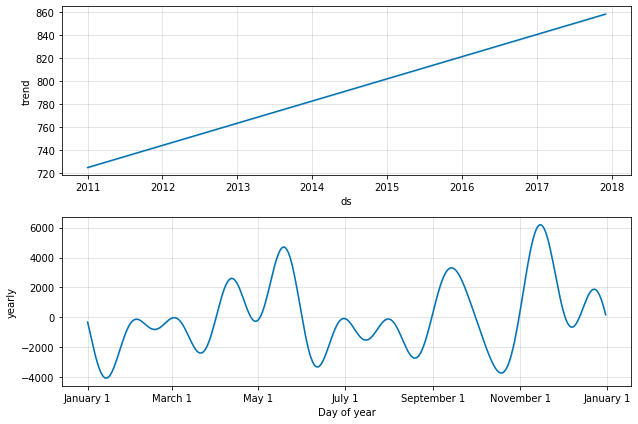

In [ ]:
#Trend and Seasonal component
fur_model.plot_components(fur_fcst)
plt.show()

# Office Supplies





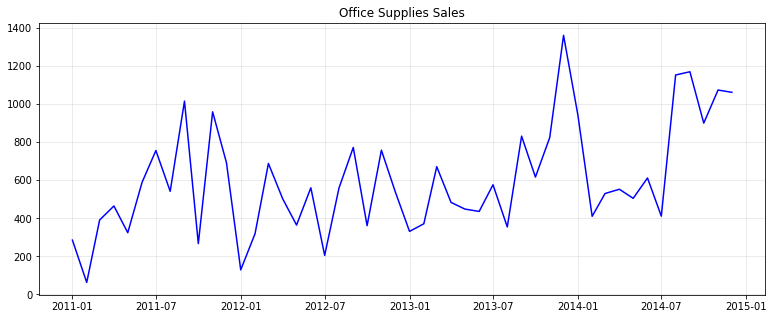

In [ ]:
#Resampling to 'Month Start'
df_office=office.resample('MS').mean()
plt.figure(figsize=(13,5))
plt.plot(df_office,color='b')
plt.title('Office Supplies Sales')
plt.grid(alpha=0.3)

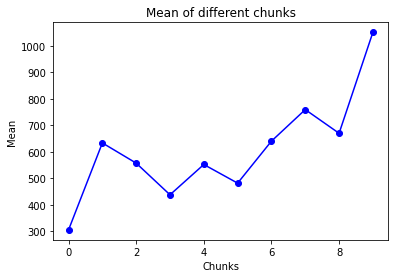

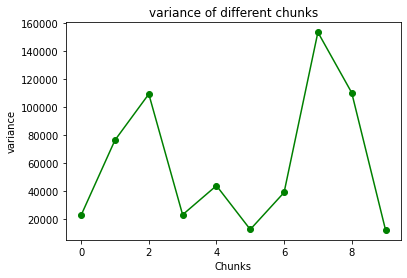

In [ ]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_office,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of Office Supplies sales')

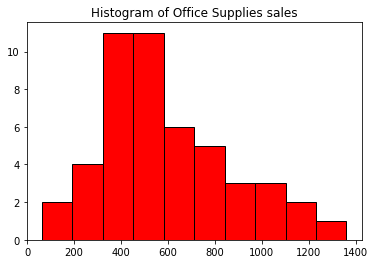

In [ ]:
#2.Histogram plots
plt.hist(df_office,color='red',edgecolor='black')
plt.title('Histogram of Office Supplies sales')

In [ ]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_office,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -4.566245617564047
p-value: 0.00014899470779268596


In [ ]:
#non stationary to stationary transformations

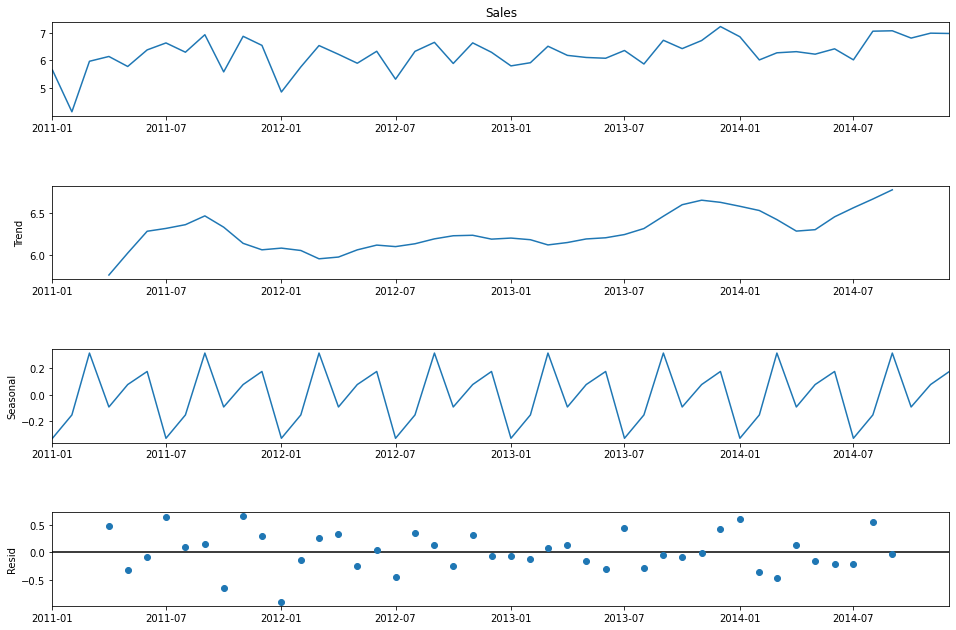

In [ ]:
df_log_office=np.log1p(df_office)
#Decomposition
#its additive-->Seasonality is independent of trend
decomp_office=seasonal_decompose(df_log_office,model='additive',period=6)
fig=decomp_office.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

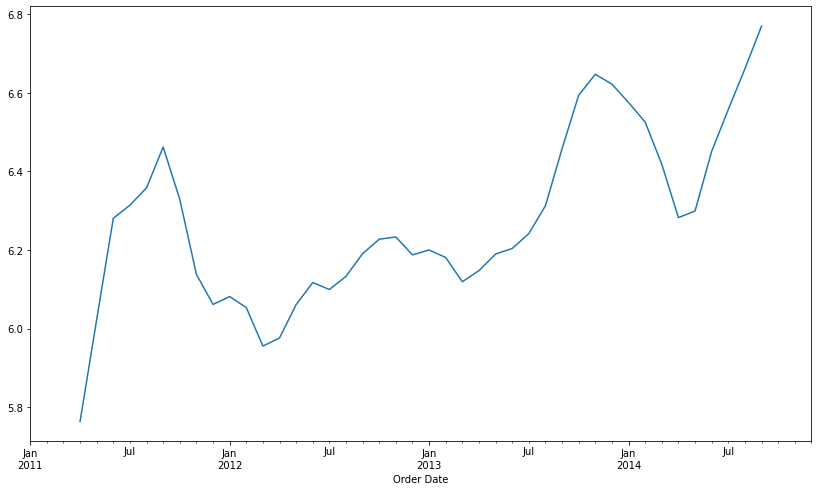

In [ ]:
decomp_office.trend.plot(figsize=(14,8))

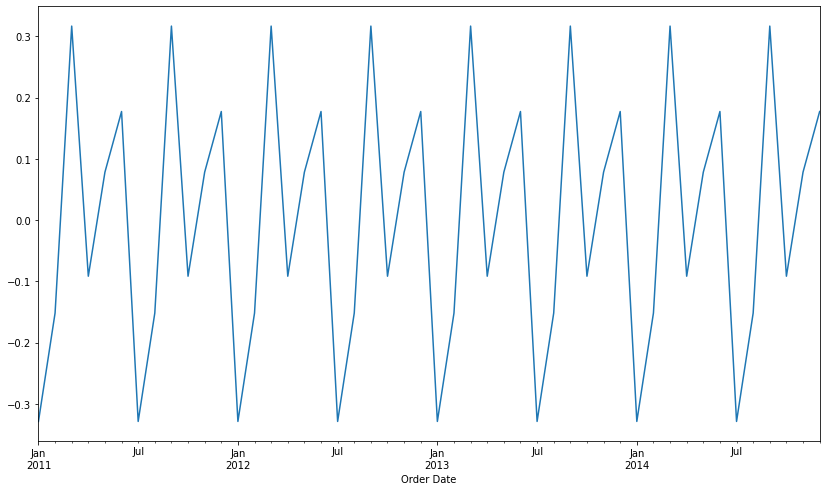

In [ ]:
decomp_office.seasonal.plot(figsize=(14,8))

In [ ]:
#Predictive Analysis

1.Triple Exponential Smoothing

In [ ]:
#time component
time=np.arange(len(df_log_office))
np_log_office=df_log_office.to_numpy()

In [ ]:
#Train Test split
#20% of 97 instance is taken as test size
test_size=10
train=np_log_office[:-test_size]
test=np_log_office[-test_size:]

In [ ]:
#Model
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [ ]:
triple_preds=np.expm1(triple_preds)
train=np.expm1(train)
test=np.expm1(test)

In [ ]:
#Evaluation
triple_mse=mean_squared_error(test,triple_preds)
print('MSE:',triple_mse)
rmse=sqrt(triple_mse)
print('RMSE:',rmse)

MSE: 60917.16005821204
RMSE: 246.81401916870936


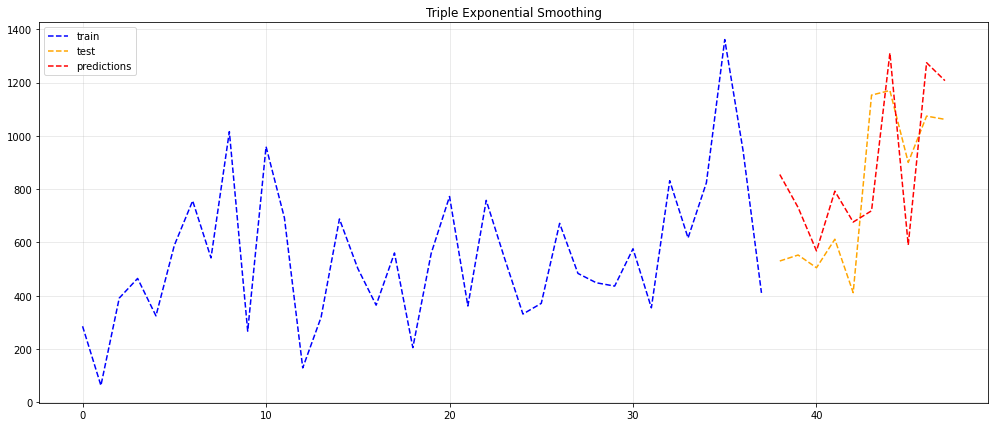

In [ ]:
#Prediction Plot
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [ ]:
print('________PREDICTIONS_________')
print(triple_preds)

________PREDICTIONS_________
[ 854.77414015  730.80702956  568.18464029  792.260739    676.39432875
  718.65554389 1310.84867451  590.51032004 1274.27191792 1207.07117946]


2.SARIMA Model

In [ ]:
#auto_arima

In [ ]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_office,start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0,max_P=3,start_Q=0,max_Q=3,d=None,D=1,
                           seasonal=True,m=12,trace=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=63.887, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=63.742, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=62.473, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=65.035, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=65.414, Time=0.19 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=64.465, Time=1.93 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=64.465, Time=1.14 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=63.742, Time=0.39 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=66.465, Time=1.42 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=60.482, Time=0.31 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=62.469, Time=0.77 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=62.469, Time=0.79 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=61.744, Time=0.71 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=64.469, Time=0.99 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=62.4

In [ ]:
#Model with best order
from statsmodels.tsa.arima.model import ARIMA
sar2=SARIMAX(df_log_office,order=(0,0,0),seasonal_order=(0,1,1,12), trend='c').fit()
sar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                      Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                 -27.241
Date:                    Fri, 17 Jun 2022   AIC                             60.482
Time:                            17:39:33   BIC                             65.232
Sample:                        01-01-2011   HQIC                            62.140
                             - 12-01-2014                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1772      0.065      2.745      0.006       0.051       0.304
ma.S.L12      -0.6533      0.496     -1.318      0.187      -1.625       0.318
sigma2         0.2234      0.100      2.231      0.026       0.027       0.420
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.89   Prob(JB):                         0.47
Heteroskedasticity (H):               0.49   Skew:                             0.29
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

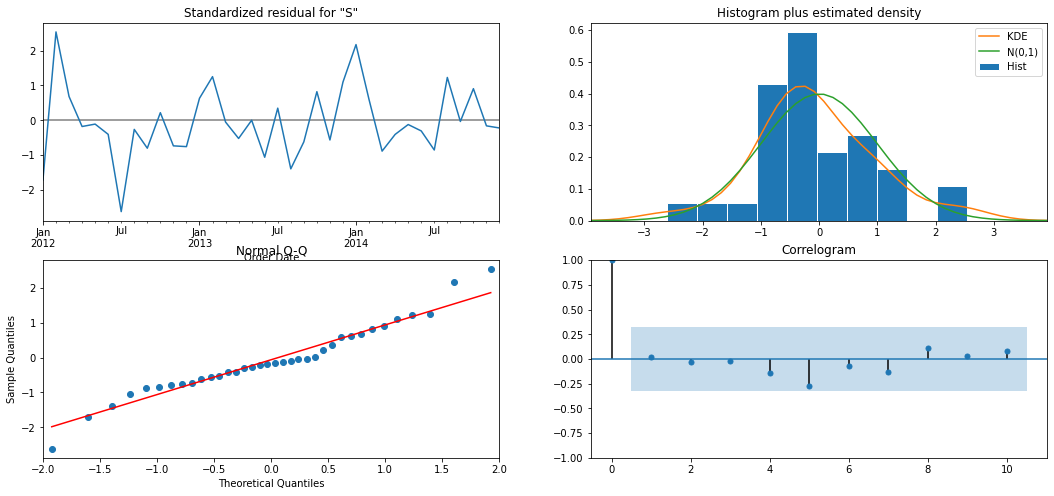

In [ ]:
#Diagnostic plot
sar2.plot_diagnostics(figsize=(18,8))
plt.show()

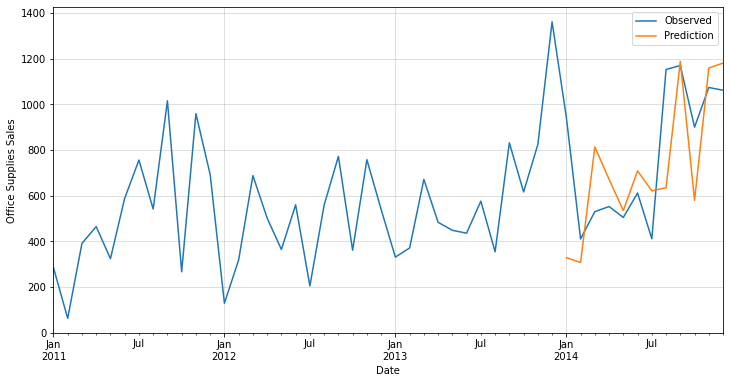

In [ ]:
#Prediction plot
pd.plotting.register_matplotlib_converters()
pred=sar2.get_prediction(start=pd.to_datetime('2014-01-01'),dynamic=False)
pred=pred.predicted_mean
pred=np.expm1(pred)
ax=df_office.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('________PREDICTIONS_________')
print(pred)

________PREDICTIONS_________
Order Date
2014-01-01     328.975962
2014-02-01     307.675191
2014-03-01     813.319215
2014-04-01     671.887648
2014-05-01     535.084378
2014-06-01     708.828062
2014-07-01     621.486712
2014-08-01     635.088452
2014-09-01    1188.315987
2014-10-01     579.486000
2014-11-01    1159.150998
2014-12-01    1180.583377
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Evaluation
test=df_office['2014-01-01':]
Mse=mean_squared_error(test,pred)
print('MSE:',Mse)
rmse=sqrt(Mse)
print('RMSE:',rmse)

MSE: 77472.6044765417
RMSE: 278.3390099798117


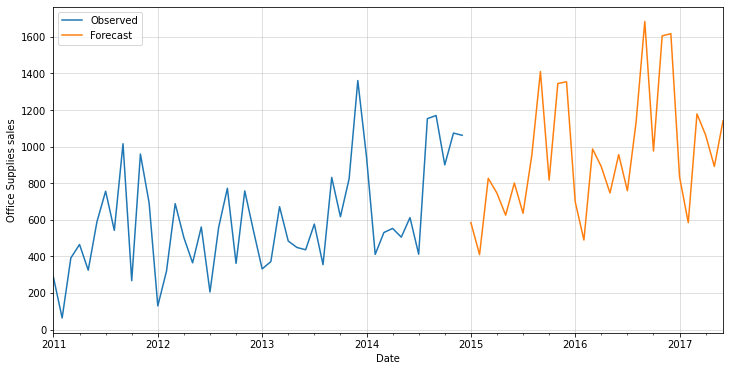

In [ ]:
#Forecast Plot
future_fcst=sar2.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_office.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Office Supplies sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('__________FORECAST________')
print(fcst)

__________FORECAST________
2015-01-01     584.542015
2015-02-01     409.702659
2015-03-01     826.653165
2015-04-01     745.400681
2015-05-01     625.184180
2015-06-01     800.806300
2015-07-01     635.404916
2015-08-01     949.427338
2015-09-01    1410.558006
2015-10-01     816.912690
2015-11-01    1344.780641
2015-12-01    1354.421390
2016-01-01     698.043835
2016-02-01     489.313512
2016-03-01     987.085956
2016-04-01     890.083442
2016-05-01     746.564101
2016-06-01     956.228920
2016-07-01     758.766031
2016-08-01    1133.658750
2016-09-01    1684.175266
2016-10-01     975.457382
2016-11-01    1605.647577
2016-12-01    1617.157095
2017-01-01     833.546916
2017-02-01     584.356180
2017-03-01    1178.617137
2017-04-01    1062.811597
2017-05-01     891.472380
2017-06-01    1141.778754
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Prophet Model

3.Prophet Model

In [ ]:
office=pd.DataFrame({'ds':df_office.index,'y':df_office.values})
office_model=Prophet()
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Blank Data frame
office_fcst=office_model.make_future_dataframe(periods=36,freq='MS')
print(office_fcst.head())
office_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


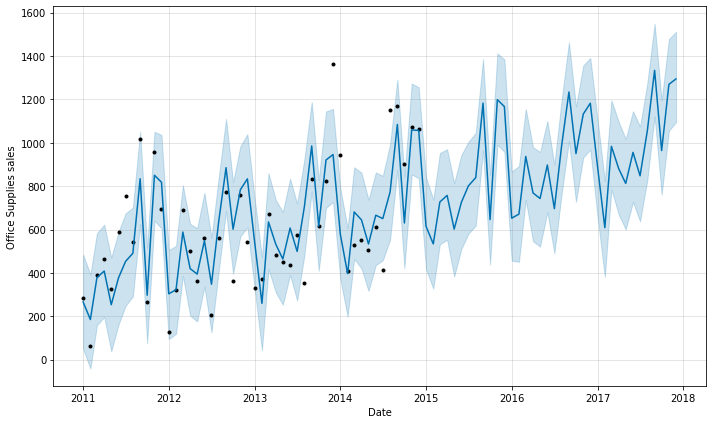

In [ ]:
#Populate df and Forecast
office_fcst=office_model.predict(office_fcst)
office_model.plot(office_fcst,xlabel='Date',ylabel='Office Supplies sales')
plt.show()

In [ ]:
print('________FORECAST________')
print(office_fcst)

________FORECAST________
           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2011-01-01   452.971406    49.471141   484.856071   452.971406   
1  2011-02-01   460.371938   -41.312097   392.120589   460.371938   
2  2011-03-01   467.056290   158.364835   583.492466   467.056290   
3  2011-04-01   474.456823   196.257892   622.120415   474.456823   
4  2011-05-01   481.618629    37.897701   469.863808   481.618629   
..        ...          ...          ...          ...          ...   
79 2017-08-01  1026.872805   828.436756  1275.495559  1026.872580   
80 2017-09-01  1034.273375  1121.475981  1549.408187  1034.273134   
81 2017-10-01  1041.435217   760.114307  1195.511551  1041.434966   
82 2017-11-01  1048.835786  1055.403045  1478.353749  1048.835523   
83 2017-12-01  1055.997628  1095.060331  1511.522005  1055.997354   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    452.971406     -186.826556           -186.826556           -18

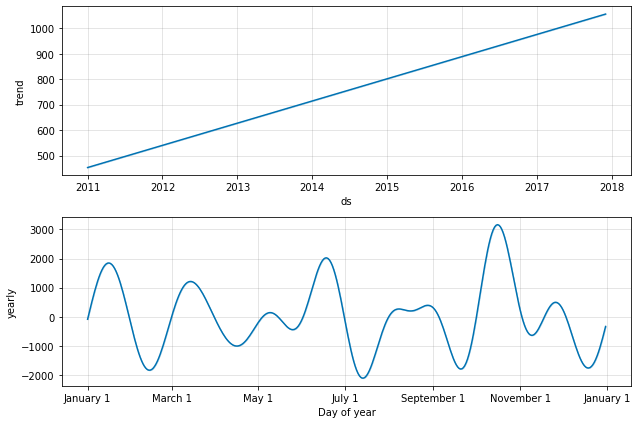

In [ ]:
#Trend and Seasonal Component
office_model.plot_components(office_fcst)
plt.show()

## Technology

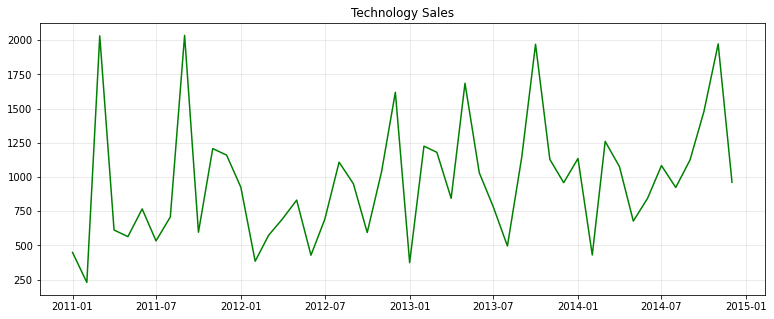

In [ ]:
#Resampling to 'Month Start'
df_tech=tech.resample('MS').mean()
plt.figure(figsize=(13,5))
plt.plot(df_tech,color='g')
plt.title('Technology Sales')
plt.grid(alpha=0.3)

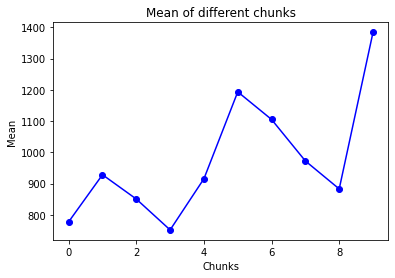

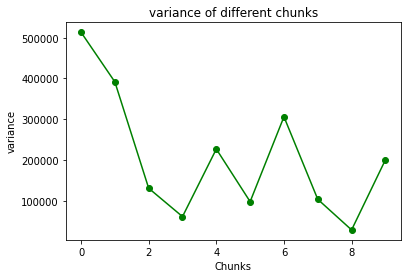

In [ ]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_tech,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of Technology sales')

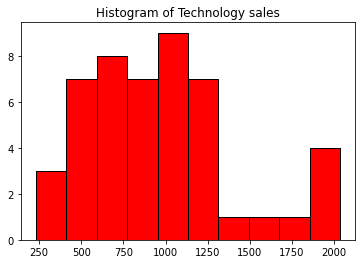

In [ ]:
#2.Histogram plots
plt.hist(df_tech,color='red',edgecolor='black')
plt.title('Histogram of Technology sales')

In [ ]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_tech,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -7.063826737791858
p-value: 5.141514777301961e-10


In [ ]:
#non-stationary to stationary transformation

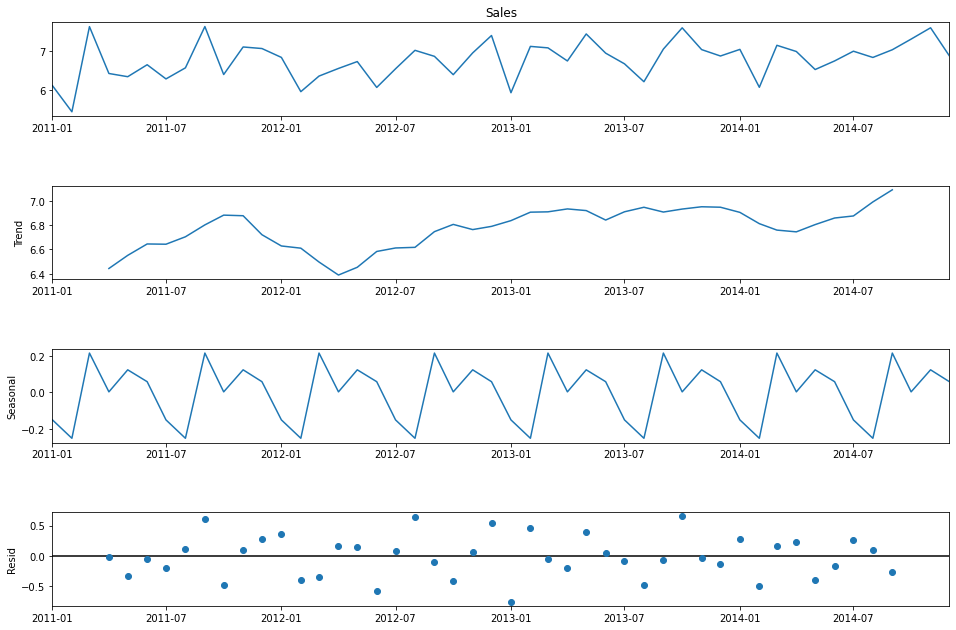

In [ ]:
df_log_tech=np.log1p(df_tech)
#Decomposition
#its additive-->Seasonality is independent of trend
decomp_tech=seasonal_decompose(df_log_tech,model='additive',period=6)
fig=decomp_tech.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

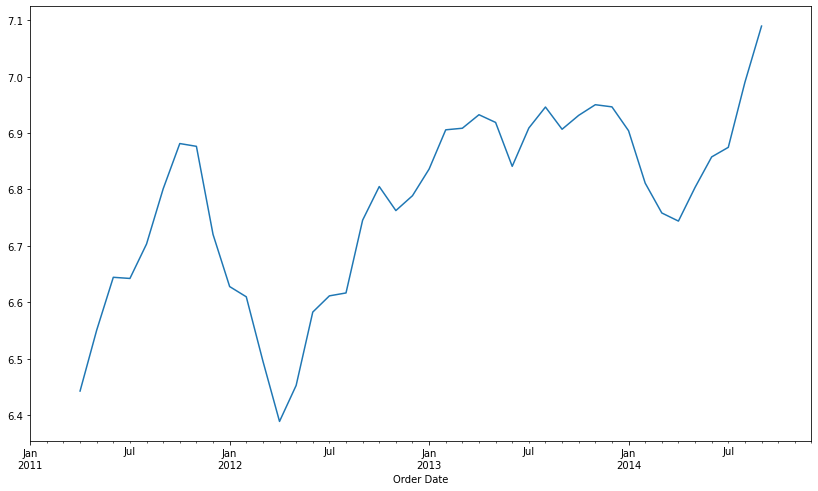

In [ ]:
decomp_tech.trend.plot(figsize=(14,8))

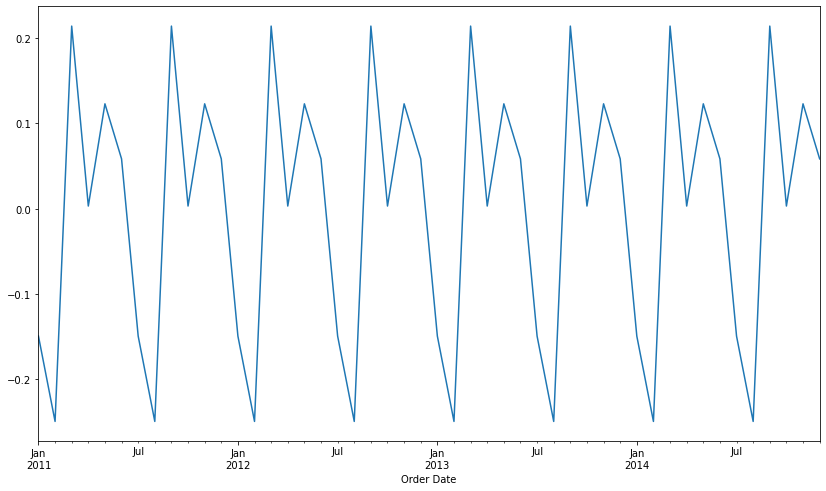

In [ ]:
decomp_tech.seasonal.plot(figsize=(14,8))

1.Triple Exponential Smoothing

In [ ]:
#time component
time=np.arange(len(df_log_tech))
np_log_tech=df_log_tech.to_numpy()

In [ ]:
#Train Test split
#20% of 97 instance is taken as test size
test_size=10
train=np_log_tech[:-test_size]
test=np_log_tech[-test_size:]

In [ ]:
#Model
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [ ]:
triple_preds=np.expm1(triple_preds)
train=np.expm1(train)
test=np.expm1(test)

In [ ]:
#Evaluation
triple_mse=mean_squared_error(test,triple_preds)
print('MSE:',triple_mse)
print('RMSE',sqrt(triple_mse))

MSE: 147965.38002487295
RMSE 384.6626834316957


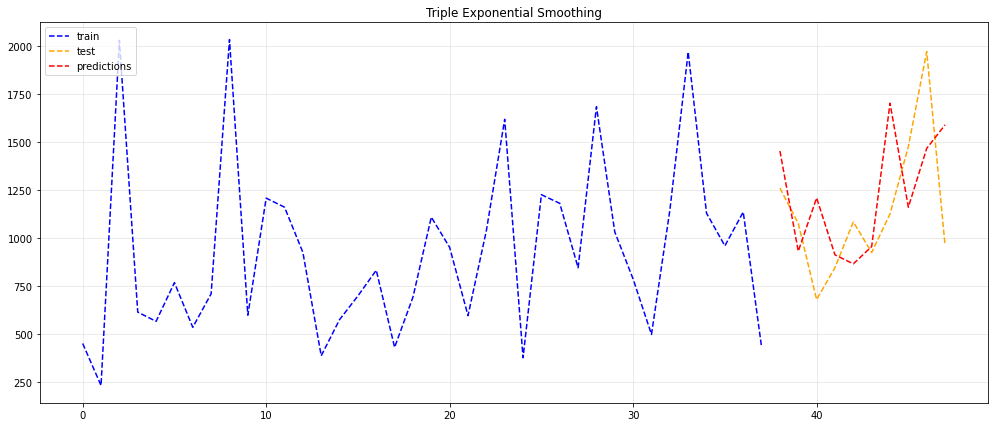

In [ ]:
#Prediction Plot
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [ ]:
print('________PREDICTIONS_________')
print(triple_preds)


________PREDICTIONS_________
[1454.21107968  930.88479496 1209.1642163   911.86839412  865.00216633
  955.15695546 1703.72374579 1160.59383449 1467.71542172 1590.68788689]


2.SARIMA Model

In [ ]:
#pdq estimation auto arima
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_tech,start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0,max_P=3,start_Q=0,max_Q=3,d=None,D=1,
                           seasonal=True,m=12,trace=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=72.244, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=62.539, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=71.109, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=72.928, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=62.523, Time=0.43 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=66.193, Time=3.17 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=62.924, Time=0.29 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=57.720, Time=0.70 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=59.405, Time=0.20 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.94 sec


In [ ]:
#Model with best Order
sar3 = SARIMAX(df_log_tech, order=(2,0,0),seasonal_order=(2,1,0,12),trend='c').fit()
sar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -22.860
Date:                            Fri, 17 Jun 2022   AIC                             57.720
Time:                                    17:40:15   BIC                             67.221
Sample:                                01-01-2011   HQIC                            61.036
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5346      0.145      3.686      0.000       0.250       0.819
ar.L1         -0.4107      0.179     -2.292      0.022      -0.762      -0.059
ar.L2         -0.4691      0.154     -3.046      0.002      -0.771      -0.167
ar.S.L12      -0.9638      0.205     -4.692      0.000      -1.366      -0.561
ar.S.L24      -0.7064      0.194     -3.638      0.000      -1.087      -0.326
sigma2         0.1137      0.056      2.024      0.043       0.004       0.224
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.66   Prob(JB):                         0.49
Heteroskedasticity (H):               0.67   Skew:                             0.11
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

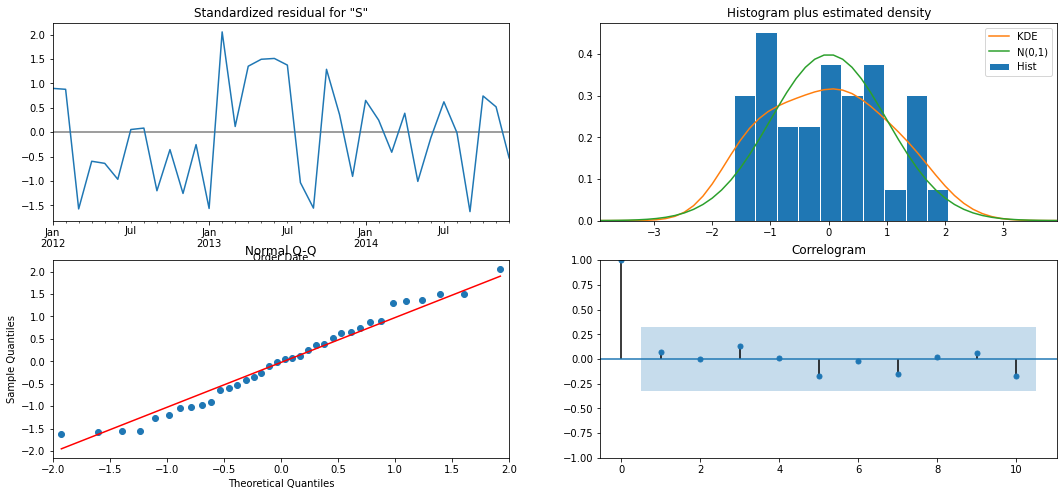

In [ ]:
#Diagnostics Plot
sar3.plot_diagnostics(figsize=(18,8))
plt.show()

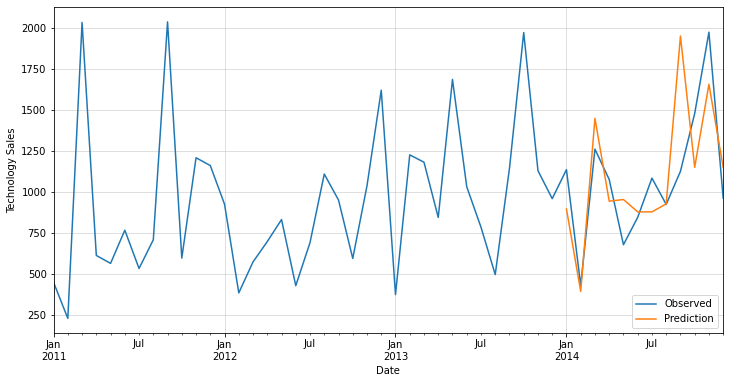

In [ ]:
#Prediction Plot
pd.plotting.register_matplotlib_converters()
pred=sar3.get_prediction(start=pd.to_datetime('2014-01-01'),dynamic=False)
pred=pred.predicted_mean
pred=np.expm1(pred)
ax=df_tech.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('_______PREDICTIONS_________')
print(pred)

_______PREDICTIONS_________
Order Date
2014-01-01     896.106861
2014-02-01     393.969997
2014-03-01    1448.053917
2014-04-01     943.498706
2014-05-01     953.751842
2014-06-01     878.266695
2014-07-01     878.335336
2014-08-01     927.177011
2014-09-01    1949.489705
2014-10-01    1149.671143
2014-11-01    1655.673602
2014-12-01    1149.206208
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Evaluation
test=df_tech['2014-01-01':]
Mse=mean_squared_error(test,pred)
print('MSE:',Mse)
rmse=sqrt(Mse)
print('RMSE:',rmse)

MSE: 96115.59766344361
RMSE: 310.0251565009582


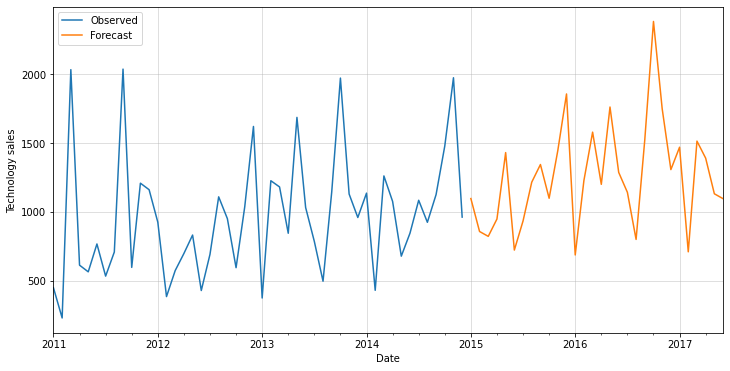

In [ ]:
#Forecast Plot
future_fcst=sar3.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_tech.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Technology sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print('_________FORECAST________')
print(fcst)

_________FORECAST________
2015-01-01    1096.466937
2015-02-01     857.383934
2015-03-01     822.100609
2015-04-01     947.991650
2015-05-01    1430.049166
2015-06-01     722.539415
2015-07-01     933.816264
2015-08-01    1215.199810
2015-09-01    1343.451239
2015-10-01    1098.544563
2015-11-01    1445.665221
2015-12-01    1855.525932
2016-01-01     687.103438
2016-02-01    1227.479582
2016-03-01    1578.350254
2016-04-01    1199.674744
2016-05-01    1760.720674
2016-06-01    1286.364936
2016-07-01    1141.535868
2016-08-01     799.919231
2016-09-01    1523.208681
2016-10-01    2381.654684
2016-11-01    1748.435869
2016-12-01    1306.531818
2017-01-01    1469.079522
2017-02-01     709.907202
2017-03-01    1513.338378
2017-04-01    1389.744715
2017-05-01    1131.093079
2017-06-01    1095.690141
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
#Prophet Model

3.Prophet Model

In [ ]:
tech=pd.DataFrame({'ds':df_tech.index,'y':df_tech.values})
tech_model=Prophet()
tech_model.fit(tech)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Blank Data frame
tech_fcst=tech_model.make_future_dataframe(periods=36,freq='MS')
print(tech_fcst.head())
tech_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


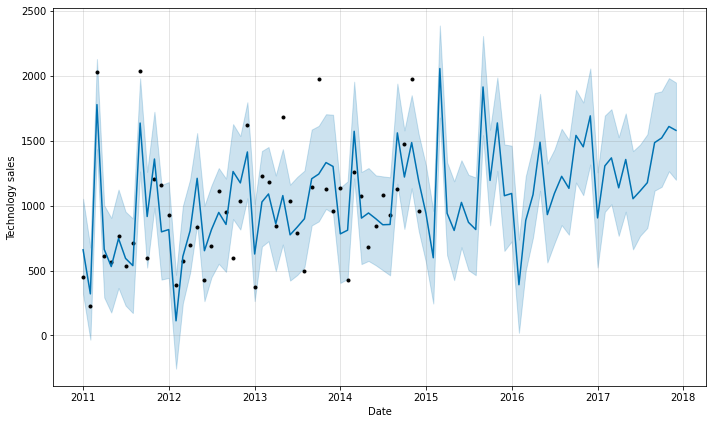

In [ ]:
#Populate df and Forecast
tech_fcst=tech_model.predict(tech_fcst)
tech_model.plot(tech_fcst,xlabel='Date',ylabel='Technology sales')
plt.show()

In [ ]:
print('_______FORECAST_______')
print(tech_fcst)

_______FORECAST_______
           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2011-01-01   731.460621   317.928958  1052.581816   731.460621   
1  2011-02-01   737.356524   -32.482400   678.015144   737.356524   
2  2011-03-01   742.681856  1433.733248  2127.922718   742.681856   
3  2011-04-01   748.577759   292.414720  1001.404379   748.577759   
4  2011-05-01   754.283471   176.545578   905.023684   754.283471   
..        ...          ...          ...          ...          ...   
79 2017-08-01  1188.678400   827.530362  1548.698954  1188.678343   
80 2017-09-01  1194.574303  1114.758218  1865.754511  1194.574243   
81 2017-10-01  1200.280016  1144.452561  1879.619991  1200.279953   
82 2017-11-01  1206.175919  1264.056478  1981.019347  1206.175853   
83 2017-12-01  1211.881631  1198.399910  1947.075757  1211.881564   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    731.460621      -71.758223            -71.758223            -71.

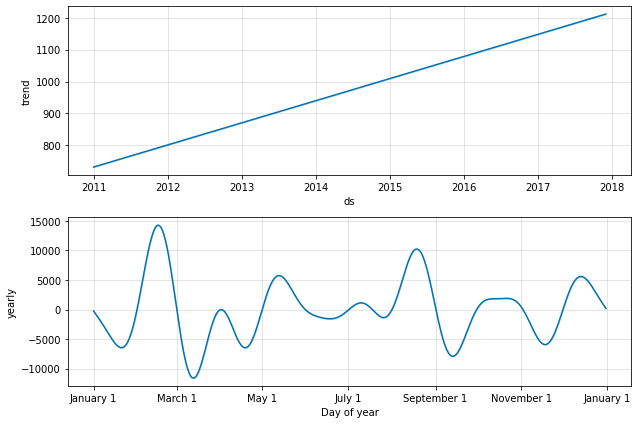

In [ ]:
#Trend and Seasonal Component
tech_model.plot_components(tech_fcst)
plt.show()